# Exploratory Analysis - Jordan
## Stats 131 Project 

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
movies = pd.read_csv("/Users/jordan_uyeki/Documents/ucla/year4/spring2019/Stats131/Project/movie_metadata.csv")

In [24]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [25]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [26]:
movies.shape

(5043, 28)

In [27]:
#keeping only title, genre, and budget columns 
genres_budget = movies[['title_year', 'movie_title', 'genres', 'budget']]
genres_budget = genres_budget.dropna(axis = 0) #remove missing values
genres_budget.head()

,title_year,movie_title,genres,budget
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0


In [28]:
genres_budget.shape

(4543, 4)

In [29]:
#only looking from after 1986
genres_budget = genres_budget.loc[genres_budget['title_year'] > 1986.0]
genres_budget.head()

,title_year,movie_title,genres,budget
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0


In [30]:
genres_budget.shape

(4110, 4)

In [31]:
genres_budget.title_year.unique()

array([2009., 2007., 2015., 2012., 2010., 2016., 2006., 2008., 2013.,
       2011., 2014., 2005., 1997., 2004., 1999., 1995., 2003., 2001.,
       2002., 1998., 2000., 1990., 1991., 1994., 1996., 1993., 1992.,
       1989., 1988., 1987.])

In [32]:
#splitting genres string into a list
genres_budget['genres_breakdown'] = [item.split("|") for item in genres_budget.genres]
genres_budget.head()

,title_year,movie_title,genres,budget,genres_breakdown
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,"[Action, Adventure, Fantasy, Sci-Fi]"
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,"[Action, Adventure, Fantasy]"
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,"[Action, Adventure, Thriller]"
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,"[Action, Thriller]"
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,"[Action, Adventure, Sci-Fi]"


In [33]:
#number of genre categories each movie is in
genres_budget['genres_amt'] = [len(item) for item in genres_budget.genres_breakdown]
genres_budget.head()

,title_year,movie_title,genres,budget,genres_breakdown,genres_amt
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,"[Action, Adventure, Fantasy, Sci-Fi]",4
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,"[Action, Adventure, Fantasy]",3
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,"[Action, Adventure, Thriller]",3
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,"[Action, Thriller]",2
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,"[Action, Adventure, Sci-Fi]",3


In [34]:
#dividing movie budget among each of its genre categories
genres_budget['split_budget'] = genres_budget.budget / genres_budget.genres_amt
genres_budget.head()

,title_year,movie_title,genres,budget,genres_breakdown,genres_amt,split_budget
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,"[Action, Adventure, Fantasy, Sci-Fi]",4,5.925000e+07
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,"[Action, Adventure, Fantasy]",3,1.000000e+08
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,"[Action, Adventure, Thriller]",3,8.166667e+07
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,"[Action, Thriller]",2,1.250000e+08
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,"[Action, Adventure, Sci-Fi]",3,8.790000e+07


In [36]:
s = genres_budget.apply(lambda x: pd.Series(x['genres_breakdown']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genres_breakdown'
yearly_breakdown = genres_budget.drop('genres_breakdown', axis = 1).join(s)
yearly_breakdown['genres_breakdown'] = pd.Series(yearly_breakdown['genres_breakdown'], dtype = object)
yearly_breakdown.head()

,title_year,movie_title,genres,budget,genres_amt,split_budget,genres_breakdown
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Action
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Adventure
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Fantasy
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Sci-Fi
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,3,100000000.0,Action


In [39]:
yearly_budgets = yearly_breakdown.groupby(['title_year', 'genres_breakdown'])['split_budget'].sum()
yearly_budgets = yearly_budgets.unstack('genres_breakdown')
yearly_budgets = yearly_budgets.fillna(0.0) 
#turning budgets into ratios by year 
yearly_budgets['total'] = yearly_budgets.sum(axis = 1)
yearly_budgets

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,total
title_year,,,,,,,,,,,,,,,,,,,,,
1987.0,4.810833e+07,4.606667e+07,3.833333e+05,2.275000e+07,5.144167e+07,2.990833e+07,0.000000e+00,5.232500e+07,1.230000e+07,1.128333e+07,...,0.000000e+00,0.0,9.966667e+06,2.356667e+07,0.0,0.000000e+00,6.145000e+07,3.250000e+06,0.000000e+00,4.195500e+08
1988.0,4.144083e+08,2.618333e+07,3.708333e+08,2.750000e+05,5.461667e+07,2.035000e+07,0.000000e+00,9.730833e+07,7.766667e+06,3.037500e+07,...,1.175000e+06,0.0,2.626667e+07,3.752667e+08,0.0,2.750000e+05,5.479167e+07,1.575000e+07,2.600000e+06,1.520900e+09
1989.0,9.052500e+07,9.582500e+07,0.000000e+00,6.166667e+06,7.819167e+07,3.850000e+07,1.600000e+05,7.152500e+07,2.500000e+06,2.550000e+07,...,4.750000e+06,0.0,1.383333e+07,4.406667e+07,0.0,8.833333e+06,7.724167e+07,1.816667e+07,0.000000e+00,6.058600e+08
1990.0,1.776667e+08,6.900000e+07,0.000000e+00,8.333333e+06,8.716513e+07,6.733333e+07,0.000000e+00,8.207500e+07,3.900680e+07,4.641667e+07,...,6.666667e+06,0.0,4.658180e+07,9.783333e+07,6800.0,2.000000e+07,8.141667e+07,0.000000e+00,2.133333e+07,9.392590e+08
1991.0,1.274333e+08,8.150000e+07,0.000000e+00,9.500000e+06,9.801150e+07,5.532500e+07,0.000000e+00,1.019615e+08,2.662500e+07,5.212500e+07,...,0.000000e+00,0.0,3.620833e+07,6.900000e+07,0.0,0.000000e+00,6.480833e+07,8.750000e+06,4.600000e+06,7.804730e+08
1992.0,1.484847e+08,3.133333e+07,4.000000e+06,1.991667e+07,8.973333e+07,4.387640e+07,0.000000e+00,1.529097e+08,1.490000e+07,4.240000e+07,...,4.166667e+06,0.0,7.707640e+07,3.506667e+07,0.0,1.583333e+07,7.254307e+07,8.000000e+06,7.200000e+06,8.574070e+08
1993.0,8.385000e+07,1.002417e+08,5.600000e+06,2.683333e+07,9.089167e+07,5.483333e+07,0.000000e+00,1.878167e+08,3.852500e+07,7.386667e+07,...,3.258333e+07,0.0,6.753333e+07,5.544167e+07,0.0,4.616667e+06,1.067667e+08,8.333333e+06,4.166667e+06,9.743000e+08
1994.0,1.739500e+08,8.968333e+07,9.000000e+06,1.960000e+07,2.860800e+08,1.582833e+08,2.333333e+05,2.588667e+08,7.116667e+07,8.033333e+07,...,2.508333e+07,0.0,6.100000e+07,2.025000e+07,0.0,2.333333e+05,2.038667e+08,7.500000e+06,2.010000e+07,1.537730e+09
1995.0,3.468333e+08,2.524571e+08,1.385714e+07,6.950000e+07,1.828083e+08,1.411333e+08,0.000000e+00,3.526155e+08,5.552381e+07,8.645000e+07,...,3.325000e+07,0.0,1.239988e+08,8.443333e+07,0.0,0.000000e+00,3.072500e+08,3.425000e+07,1.066667e+07,2.195925e+09


In [42]:
#turning budgets into ratios (by year) 
budget_ratio = yearly_budgets.loc[:, 'Action':'Western'].div(yearly_budgets['total'], axis = 0)
budget_ratio

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
title_year,,,,,,,,,,,,,,,,,,,,,
1987.0,0.114667,0.109800,0.000914,0.054225,0.122612,0.071287,0.000000,0.124717,0.029317,0.026894,...,0.000914,0.000000,0.000000,0.023756,0.056171,0.000000,0.000000,0.146466,0.007746,0.000000
1988.0,0.272476,0.017216,0.243825,0.000181,0.035911,0.013380,0.000000,0.063981,0.005107,0.019972,...,0.001425,0.000773,0.000000,0.017270,0.246740,0.000000,0.000181,0.036026,0.010356,0.001710
1989.0,0.149416,0.158164,0.000000,0.010178,0.129059,0.063546,0.000264,0.118055,0.004126,0.042089,...,0.000000,0.007840,0.000000,0.022833,0.072734,0.000000,0.014580,0.127491,0.029985,0.000000
1990.0,0.189156,0.073462,0.000000,0.008872,0.092802,0.071688,0.000000,0.087383,0.041529,0.049418,...,0.000007,0.007098,0.000000,0.049594,0.104160,0.000007,0.021293,0.086682,0.000000,0.022713
1991.0,0.163277,0.104424,0.000000,0.012172,0.125580,0.070887,0.000000,0.130641,0.034114,0.066786,...,0.012172,0.000000,0.000000,0.046393,0.088408,0.000000,0.000000,0.083037,0.011211,0.005894
1992.0,0.173179,0.036544,0.004665,0.023229,0.104657,0.051173,0.000000,0.178340,0.017378,0.049451,...,0.007464,0.004860,0.000000,0.089895,0.040899,0.000000,0.018467,0.084608,0.009330,0.008397
1993.0,0.086062,0.102886,0.005748,0.027541,0.093289,0.056280,0.000000,0.192771,0.039541,0.075815,...,0.000000,0.033443,0.000000,0.069315,0.056904,0.000000,0.004738,0.109583,0.008553,0.004277
1994.0,0.113121,0.058322,0.005853,0.012746,0.186040,0.102933,0.000152,0.168343,0.046280,0.052242,...,0.005853,0.016312,0.000000,0.039669,0.013169,0.000000,0.000152,0.132576,0.004877,0.013071
1995.0,0.157944,0.114966,0.006310,0.031650,0.083249,0.064271,0.000000,0.160577,0.025285,0.039368,...,0.003578,0.015142,0.000000,0.056468,0.038450,0.000000,0.000000,0.139918,0.015597,0.004857


In [44]:
#checking ratios (should all be 1) 
budget_ratio.sum(axis = 1)

title_year
1987.0    1.0
1988.0    1.0
1989.0    1.0
1990.0    1.0
1991.0    1.0
1992.0    1.0
1993.0    1.0
1994.0    1.0
1995.0    1.0
1996.0    1.0
1997.0    1.0
1998.0    1.0
1999.0    1.0
2000.0    1.0
2001.0    1.0
2002.0    1.0
2003.0    1.0
2004.0    1.0
2005.0    1.0
2006.0    1.0
2007.0    1.0
2008.0    1.0
2009.0    1.0
2010.0    1.0
2011.0    1.0
2012.0    1.0
2013.0    1.0
2014.0    1.0
2015.0    1.0
2016.0    1.0
dtype: float64

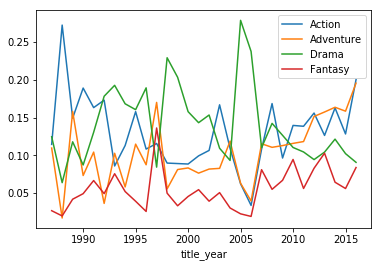

In [50]:
#results['BMXLEG'].plot(label = "leg length")
budget_ratio['Action'].plot(label = "Action")
budget_ratio['Adventure'].plot(label = "Adventure")
budget_ratio['Drama'].plot(label = "Drama")
budget_ratio['Fantasy'].plot(label = "Fantasy")
plt.legend()